## Exploratory Analysis

Exploratory analysis of SemEval 2017 dataset. Don't download files as I've already got them 

In [14]:
import os
from glob import glob
import pandas as pd

files = glob("../data/SemEval2017/GOLD/Subtask_A/twitter*.txt", recursive=True)
sorted(files)

['../data/SemEval2017/GOLD/Subtask_A/twitter-2013dev-A.txt',
 '../data/SemEval2017/GOLD/Subtask_A/twitter-2013test-A.txt',
 '../data/SemEval2017/GOLD/Subtask_A/twitter-2013train-A.txt',
 '../data/SemEval2017/GOLD/Subtask_A/twitter-2014sarcasm-A.txt',
 '../data/SemEval2017/GOLD/Subtask_A/twitter-2014test-A.txt',
 '../data/SemEval2017/GOLD/Subtask_A/twitter-2015test-A.txt',
 '../data/SemEval2017/GOLD/Subtask_A/twitter-2015train-A.txt',
 '../data/SemEval2017/GOLD/Subtask_A/twitter-2016dev-A.txt',
 '../data/SemEval2017/GOLD/Subtask_A/twitter-2016devtest-A.txt',
 '../data/SemEval2017/GOLD/Subtask_A/twitter-2016test-A.txt',
 '../data/SemEval2017/GOLD/Subtask_A/twitter-2016train-A.txt']

In [35]:
import csv
import pandas as pd

def read_table(path):
    """
    Read SemEval table and return dataframe
    """
    df = pd.read_table(path, header=None, quoting=csv.QUOTE_NONE)
    # Get rid of last column

    if len(df.columns) > 3:
        del df[3]
    df.columns = ["id", "label", "text"]
    if df["text"].isna().any():
        print(path)
        print(df[df["text"].isna()])
    df = df[df["text"].notna()]
    #df.set_index("id", inplace=True)
    return df

pd.options.display.max_colwidth = 200
pd.options.display.max_rows = 100


train_df = pd.concat([read_table(f) for f in files])
train_df.drop_duplicates("id", inplace=True)
train_df.set_index("id", inplace=True)
print("Len train : ", train_df.shape)



../data/SemEval2017/GOLD/Subtask_A/twitter-2016test-A.txt
      id label text
11064  "   NaN  NaN
Len train :  (49645, 2)


In [36]:
test_df = pd.read_table("../data/SemEval2017/SemEval2017-task4-dev.subtask-A.english.INPUT.txt", header=None, quoting=csv.QUOTE_NONE)

del test_df[3]
test_df.columns = ["id", "label", "text"]
test_df.set_index("id", inplace=True)
test_df

,label,text
id,,
619950566786113536,neutral,"""Picturehouse's, Pink Floyd's, 'Roger Waters: The Walll - opening 29 Sept is now making waves. Watch the trailer on Rolling Stone - look..."""
619969366986235905,neutral,Order Go Set a Watchman in store or through our website before Tuesday and get it half price! #GSAW @GSAWatchmanBook https://t.co/KET6EGD1an
619971047195045888,negative,"""If these runway renovations at the airport prevent me from seeing Taylor Swift on Monday, Bad Blood will have a new meaning."""
619974445185302528,neutral,"""If you could ask an onstage interview question at Miss USA tomorrow, what would it be?"""
619987808317407232,positive,A portion of book sales from our Harper Lee/Go Set a Watchman release party on Mon. 7/13 will support @CAP_Tulsa and the great work they do.
...,...,...
681877834982232064,neutral,"""@ShaquilleHoNeal from what I think you're asking, in no order. Future, Drake, Thug, Cole, Kendrick and Tiller a close 6th"""
681879579129200640,positive,"""Iran ranks 1st in liver surgeries, Allah bless the country."""
681883903259357184,neutral,"""Hours before he arrived in Saudi Arabia on Tuesday, Turkish President Recep Tayyip Erdogan accused Syria's president of """"mercilessly""""..."""


Salvemos esto así nos olvidamos de una vez

In [37]:
train_df.to_csv("../data/SemEval2017/train.csv")
test_df.to_csv("../data/SemEval2017/test.csv")

In [39]:
train_df = pd.read_csv("../data/SemEval2017/train.csv")
test_df = pd.read_csv("../data/SemEval2017/test.csv")

print(f"Train instances = {len(train_df)}")
print(f"Test instances  = {len(test_df)}")


Train instances = 49645
Test instances  = 20632


(array([3.0000e+00, 3.0000e+02, 1.8400e+03, 4.3520e+03, 6.6880e+03,
        8.9020e+03, 2.1998e+04, 5.4300e+03, 1.2600e+02, 6.0000e+00]),
 array([  1. ,  20.9,  40.8,  60.7,  80.6, 100.5, 120.4, 140.3, 160.2,
        180.1, 200. ]),
 <BarContainer object of 10 artists>)

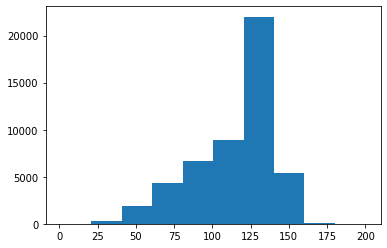

In [40]:
import matplotlib.pyplot as plt


plt.hist(train_df["text"].apply(lambda x: len(x)))

There are repeated rows => remove duplicates

In [42]:
train_df["label"].value_counts(normalize=True)

neutral     0.448041
positive    0.395992
negative    0.155967
Name: label, dtype: float64

Majority are neutral